# Behavioral Cloning (BC): Ant-v4 Experiment Analysis

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os

os.chdir('/home/mohsen/projects/cs285/hw1/')

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [4]:
import matplotlib as mpl

mpl.rcParams['figure.dpi'] = '150'

In [5]:
exp_path = 'tune_exps/'

In [6]:
cat_hyper_params = ['batch_size', 'n_layers', 'size', 
                    'train_batch_size', 'num_agent_train_steps_per_iter']
cont_hyper_params = ['learning_rate']

## Ant v4 Experiment Hyper-parameter optimization analysis

In [7]:
ant_experiments = [folder for folder in os.listdir(exp_path) if folder.startswith('q1_tune_ant')]

In [8]:
len(ant_experiments)

1100

In [9]:
import json

In [10]:
from tqdm import tqdm

In [11]:
df = None
for experiment in tqdm(sorted(ant_experiments)):
    try:
        progress_df = pd.read_csv(os.path.join(exp_path, experiment, 'progress.csv'))
        if len(progress_df) >= 1:
            # print(experiment)
            progress_df['id'] = experiment
            
            params = json.load(open(os.path.join(exp_path, experiment, 'hyper-params.json'), 'r'))
            if params['eval_batch_size'] != 10000 or params['ep_len'] != 1024: 
                continue
            
            for key, value in params.items():
                if key not in ['agent_params', 'env_kwargs']:
                    progress_df[key] = value
                else:
                    for key2, value2 in params[key].items():
                        progress_df[key2] = value2
            
            if df is None:
                df = progress_df.copy()
            else:
                df = pd.concat([df, progress_df], axis=0)
        else:
            continue
    except:
        continue
    

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1100/1100 [00:07<00:00, 147.81it/s]


In [12]:
df.head()

,Eval_AverageReturn,Eval_StdReturn,Eval_MaxReturn,Eval_MinReturn,Eval_AverageEpLen,Train_AverageReturn,Train_StdReturn,Train_MaxReturn,Train_MinReturn,Train_AverageEpLen,...,which_gpu,max_replay_buffer_size,save_params,seed,logdir,discrete,ac_dim,ob_dim,render_mode,use_contact_forces
0,-452.96270,773.97570,-37.232380,-2645.0254,183.965517,4713.6533,12.196533,4725.8496,4701.4565,1000.0,...,0,1000000,False,1046,/home/mohsen/projects/cs285/homework_fall2022/...,False,8,111,None,True
0,-366.02660,503.94922,-6.641037,-1474.8439,329.406250,4713.6533,12.196533,4725.8496,4701.4565,1000.0,...,0,1000000,False,1499,/home/mohsen/projects/cs285/homework_fall2022/...,False,8,111,None,True
0,3672.11500,743.07630,4256.860400,2137.4382,968.454545,4713.6533,12.196533,4725.8496,4701.4565,1000.0,...,0,1000000,False,1075,/home/mohsen/projects/cs285/homework_fall2022/...,False,8,111,None,True
0,-555.20166,922.68000,-21.069480,-2647.7788,217.978261,4713.6533,12.196533,4725.8496,4701.4565,1000.0,...,0,1000000,False,524,/home/mohsen/projects/cs285/homework_fall2022/...,False,8,111,None,True
0,-512.62920,792.43200,-14.329021,-2507.3180,224.148936,4713.6533,12.196533,4725.8496,4701.4565,1000.0,...,0,1000000,False,1480,/home/mohsen/projects/cs285/homework_fall2022/...,False,8,111,None,True


In [13]:
df.shape

(1095, 42)

In [14]:
df['Training Loss'].describe()

count    1095.000000
mean       -0.018789
std         0.960383
min        -2.655800
25%        -0.801842
50%         0.380399
75%         0.796859
max         0.989641
Name: Training Loss, dtype: float64

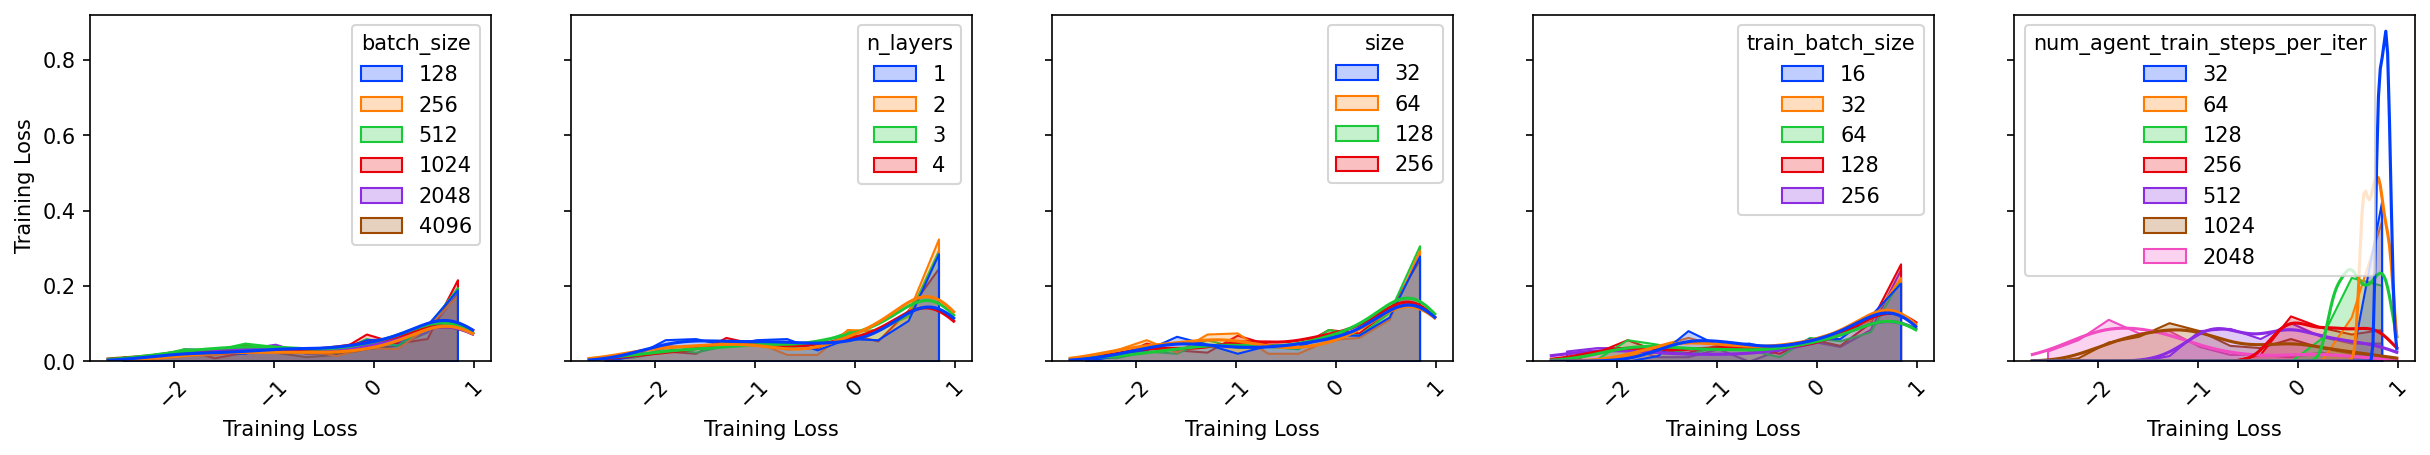

In [15]:
fig, ax = plt.subplots(1, len(cat_hyper_params), sharey=True, sharex=False, figsize=(20, 3))
# fig.text(0.5, 0.04, 'common X', ha='center')
fig.text(0.1, 0.5, 'Training Loss', va='center', rotation='vertical')
for i, param in enumerate(cat_hyper_params):
    g = sns.histplot(data=df, x='Training Loss', hue=param, ax=ax[i], fill=True,
                     palette=sns.color_palette('bright', len(df[param].unique())), kde=True, 
                     element='poly', stat='density')
    g.set_ylabel('')
    ax[i].tick_params(axis='x', rotation=45)

/tmp/ipykernel_3596928/3270517599.py:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  g = sns.histplot(data=df, x=param, y='Training Loss', kde=True,


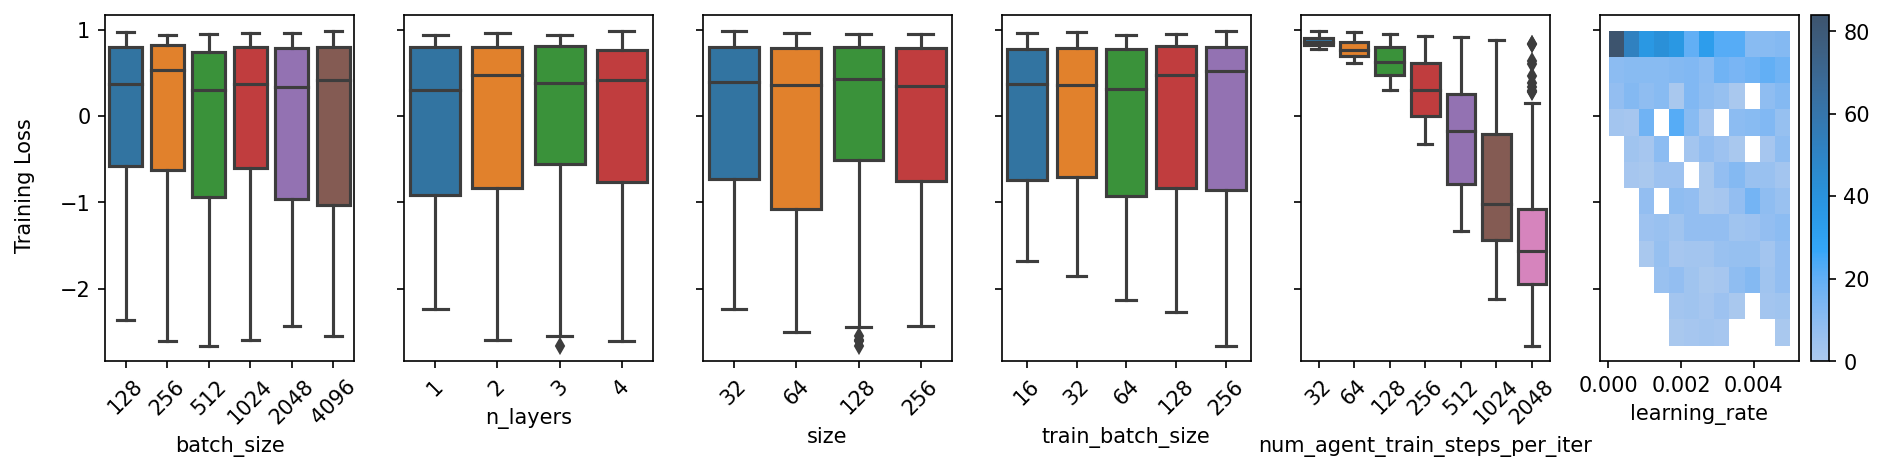

In [16]:
fig, ax = plt.subplots(1, len(cat_hyper_params) + len(cont_hyper_params), sharey=True, sharex=False, figsize=(15, 3))
# fig.text(0.5, 0.04, 'common X', ha='center')
fig.text(0.085, 0.5, 'Training Loss', va='center', rotation='vertical')
for i, param in enumerate(cat_hyper_params):
    g = sns.boxplot(data=df, x=param, y='Training Loss', ax=ax[i])
    g.set_ylabel('')
    ax[i].tick_params(axis='x', rotation=45)

offset = len(cat_hyper_params)

for i, param in enumerate(cont_hyper_params):
    # g = sns.scatterplot(data=df, x=param, y='Training Loss', ax=ax[i + offset])
    # g.set_ylabel('')
    g = sns.histplot(data=df, x=param, y='Training Loss', kde=True,
            palette=sns.color_palette("coolwarm", as_cmap=True), cbar=True,
            ax=ax[i + offset])
    # ax[i].tick_params(axis='x', rotation=45)

/tmp/ipykernel_3596928/2945391405.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(data=df, x='learning_rate', y='Training Loss', kind="kde",
/home/mohsen/miniconda3/envs/cs285/lib/python3.9/site-packages/seaborn/distributions.py:1191: UserWarning: The following kwargs were not used by contour: 'binwidth'
  cset = contour_func(


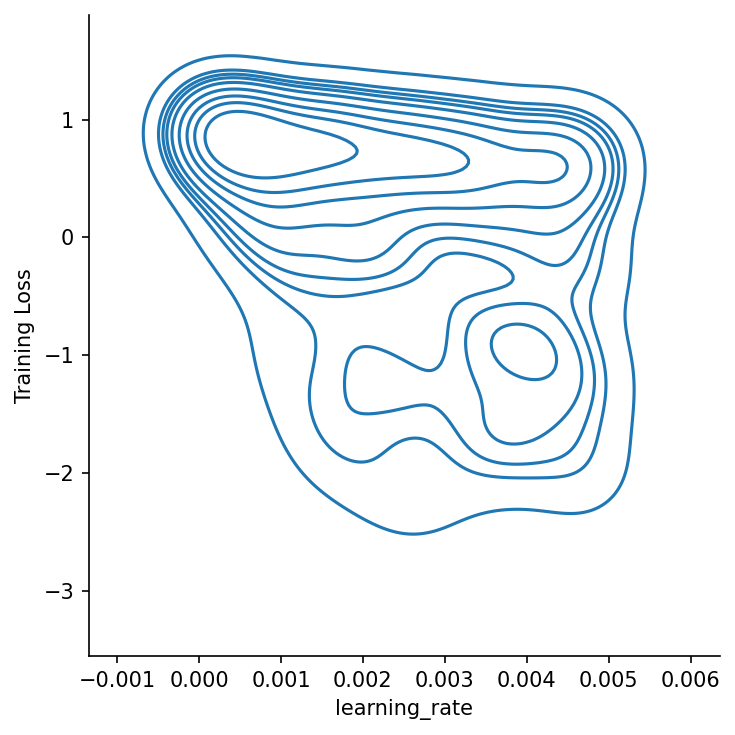

In [17]:
sns.displot(data=df, x='learning_rate', y='Training Loss', kind="kde",
            palette=sns.color_palette("coolwarm", as_cmap=True), 
            binwidth=(0.1, .1e-5), cbar=False)

In [18]:
df[df['Training Loss'] == df['Training Loss'].min()]['id']

0    q1_tune_ant_Ant-v4_15-09-2022_19-25-13
Name: id, dtype: object

In [19]:
plot_df = df[cat_hyper_params]
target_df = df['Training Loss']

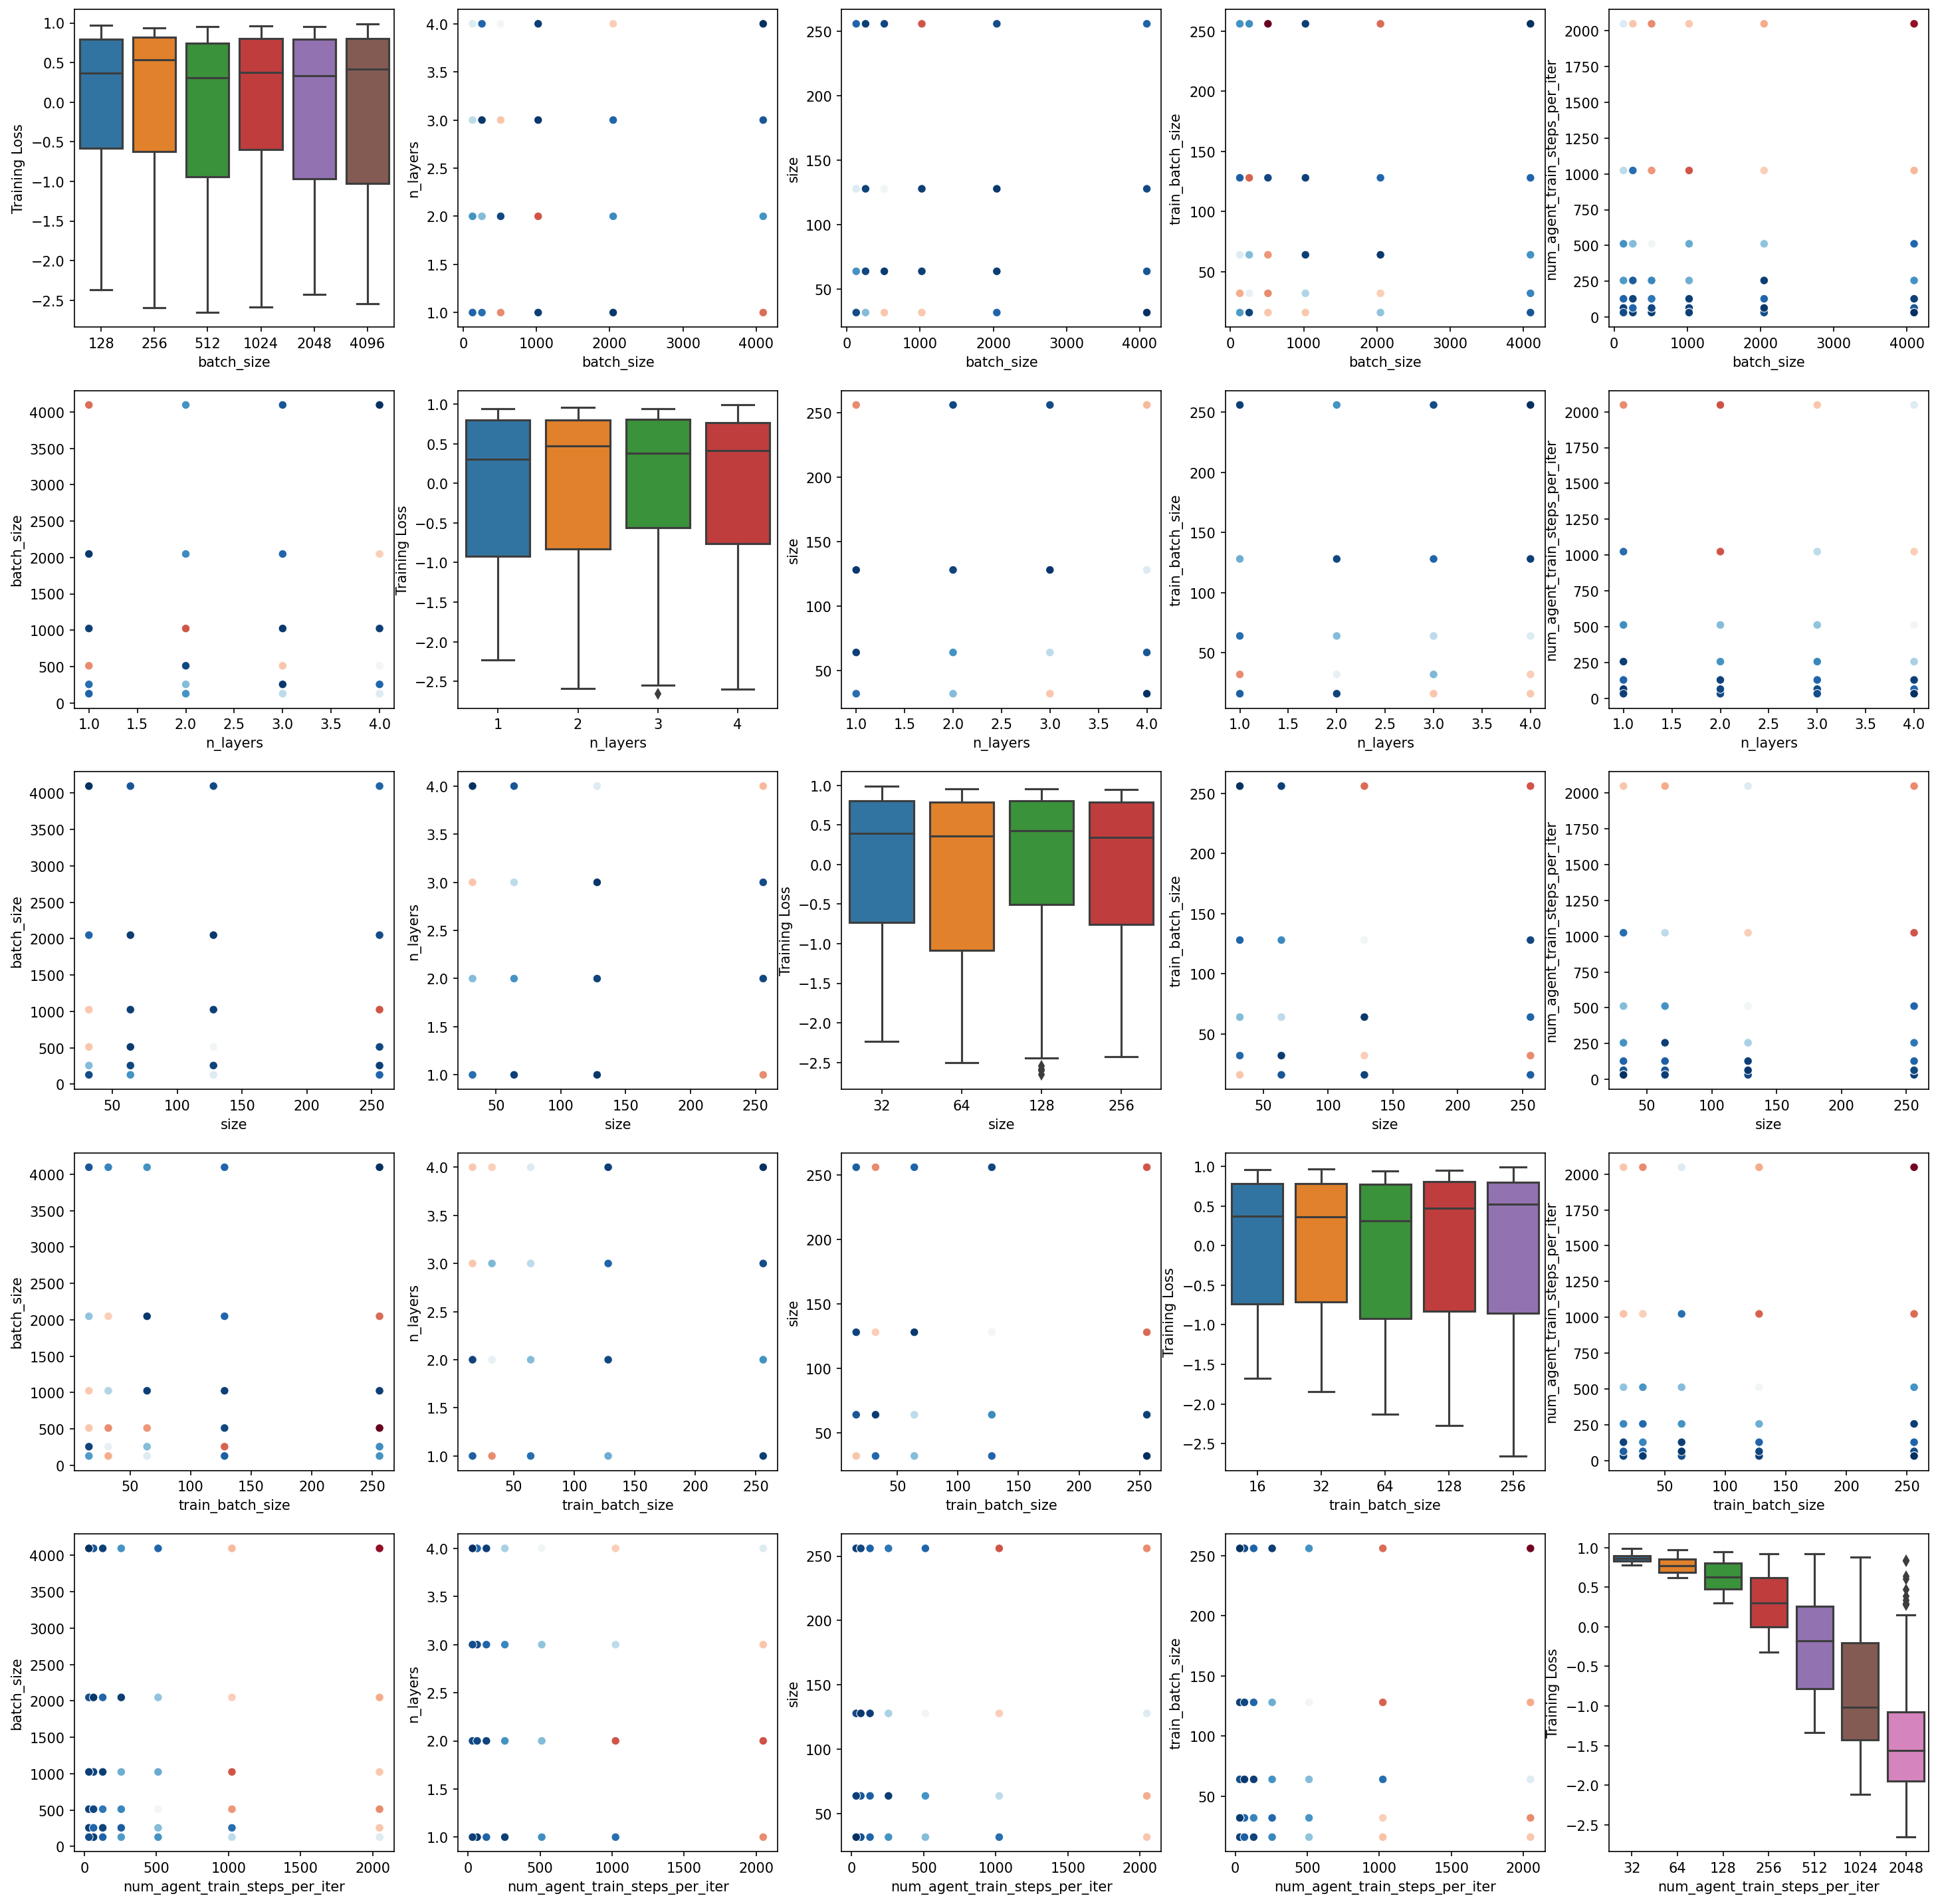

In [20]:
num_features = len(plot_df.columns)
fig,ax = plt.subplots(num_features, num_features, figsize=(24, 24), squeeze=True)
for idx, i in enumerate(plot_df.columns):
    for jdx, j in enumerate(plot_df.columns):
        if i == j:    # diagonal
            # sns.scatterplot(x=plot_df[i], y=plot_df[j], hue, ax=ax[idx][jdx])
            sns.boxplot(x=plot_df[i],y=target_df, 
                        ax=ax[idx][jdx],
                        )
        else:       # off diagonal
            sns.scatterplot(x=plot_df[i],y=plot_df[j], 
                            ax=ax[idx][jdx], hue=target_df, palette=sns.color_palette('RdBu', as_cmap=True),
                            legend=False)


In [21]:
df['Training Loss'].quantile(0.1)

-1.60406608

## Evaluating the best model's performance

### Best config extraction

In [22]:
df[df['Training Loss'] == df['Training Loss'].min()].to_dict(orient='records')

[{'Eval_AverageReturn': 4723.0845,
  'Eval_StdReturn': 163.11101,
  'Eval_MaxReturn': 4998.0376,
  'Eval_MinReturn': 4409.487,
  'Eval_AverageEpLen': 1000.0,
  'Train_AverageReturn': 4713.6533,
  'Train_StdReturn': 12.196533,
  'Train_MaxReturn': 4725.8496,
  'Train_MinReturn': 4701.4565,
  'Train_AverageEpLen': 1000.0,
  'Train_EnvstepsSoFar': 0,
  'TimeSinceStart': 21.08691143989563,
  'Training Loss': -2.6558003,
  'Initial_DataCollection_AverageReturn': 4713.6533,
  'id': 'q1_tune_ant_Ant-v4_15-09-2022_19-25-13',
  'expert_policy_file': 'cs285/policies/experts/Ant.pkl',
  'expert_data': 'cs285/expert_data/expert_data_Ant-v4.pkl',
  'env_name': 'Ant-v4',
  'exp_name': 'tune_ant',
  'do_dagger': False,
  'ep_len': 1024,
  'num_agent_train_steps_per_iter': 2048,
  'n_iter': 1,
  'batch_size': 512,
  'eval_batch_size': 10000,
  'train_batch_size': 256,
  'n_layers': 3,
  'size': 128,
  'learning_rate': 0.0031029847304798333,
  'video_log_freq': -1,
  'scalar_log_freq': 1,
  'no_gpu': F

In [23]:
!pwd

/home/mohsen/projects/cs285/hw1


In [24]:
!MUJOCO_GL="egl" python -m cs285.scripts.run_hw1 --expert_policy_file cs285/policies/experts/Ant.pkl --env_name Ant-v4 --exp_name bc_ant_best --n_iter 1 --expert_data cs285/expert_data/expert_data_Ant-v4.pkl --video_log_freq 1 --size 128 --n_layers 3 --train_batch_size 256 --ep_len 1024 --batch_size 512 --eval_batch_size 10000 --learning_rate 0.0031029847304798333 --num_agent_train_steps_per_iter 2048 --seed 527 --save_params

########################
logging outputs to  /home/mohsen/projects/cs285/hw1/cs285/scripts/../../data/q1_bc_ant_best_Ant-v4_16-09-2022_17-59-23
########################
Using GPU id 0
Loading expert policy from... cs285/policies/experts/Ant.pkl
obs (1, 111) (1, 111)
Done restoring expert policy...


********** Iteration 0 ************

Training agent using sampled data from replay buffer...
Training stopped with early stopping!

Beginning logging procedure...

Iteration : 0
Eval_AverageReturn : 4689.2021484375
Eval_StdReturn : 99.34574127197266
Eval_MaxReturn : 4885.60205078125
Eval_MinReturn : 4528.55615234375
Eval_AverageEpLen : 1000.0
Train_AverageReturn : 4713.6533203125
Train_StdReturn : 12.196533203125
Train_MaxReturn : 4725.849609375
Train_MinReturn : 4701.45654296875
Train_AverageEpLen : 1000.0
Train_EnvstepsSoFar : 0
TimeSinceStart : 40.51818609237671
Training Loss : -2.0705580711364746
Initial_DataCollection_AverageReturn : 4713.6533203125
Expert_AverageReturn : 4498.11669921